## GroupBy

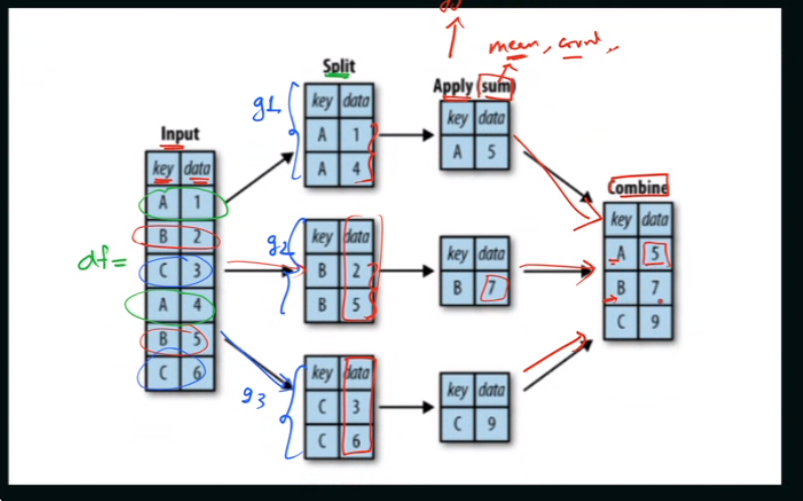

In [2]:
import pandas as pd

In [4]:
movies = pd.read_csv("movies.csv", index_col=0)
movies.head().reset_index(drop=True)

,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday


In [6]:
directors = pd.read_csv('directors.csv', index_col=0)
directors

,director_name,id,gender
0,James Cameron,4762,Male
1,Gore Verbinski,4763,Male
2,Sam Mendes,4764,Male
3,Christopher Nolan,4765,Male
4,Andrew Stanton,4766,Male
...,...,...,...
2344,Shane Carruth,7106,Male
2345,Neill Dela Llana,7107,NaN
2346,Scott Smith,7108,NaN
2347,Daniel Hsia,7109,Male


In [15]:
movie_data = pd.merge(movies, directors, how='left', left_on='director_id', right_on='id' )
movie_data

,id_x,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,id_y,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday,James Cameron,4762,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday,Gore Verbinski,4763,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday,Sam Mendes,4764,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday,Christopher Nolan,4765,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday,Sam Raimi,4767,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,48363,0,3,321952,The Last Waltz,7.9,64,4809,1978,May,Monday,Martin Scorsese,4809,Male
1461,48370,27000,19,3151130,Clerks,7.4,755,5369,1994,Sep,Tuesday,Kevin Smith,5369,Male
1462,48375,0,7,0,Rampage,6.0,131,5148,2009,Aug,Friday,Uwe Boll,5148,Male
1463,48376,0,3,0,Slacker,6.4,77,5535,1990,Jul,Friday,Richard Linklater,5535,Male


In [16]:
movie_data.drop('id_y', axis=1, inplace=True)
movie_data

,id_x,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday,James Cameron,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday,Gore Verbinski,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday,Sam Mendes,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday,Christopher Nolan,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday,Sam Raimi,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,48363,0,3,321952,The Last Waltz,7.9,64,4809,1978,May,Monday,Martin Scorsese,Male
1461,48370,27000,19,3151130,Clerks,7.4,755,5369,1994,Sep,Tuesday,Kevin Smith,Male
1462,48375,0,7,0,Rampage,6.0,131,5148,2009,Aug,Friday,Uwe Boll,Male
1463,48376,0,3,0,Slacker,6.4,77,5535,1990,Jul,Friday,Richard Linklater,Male


In [19]:
movie_group = movie_data.groupby(by='director_name')

In [20]:
movie_group.get_group('Sam Mendes')

,id_x,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,gender
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday,Sam Mendes,Male
21,43626,200000000,93,1108561013,Skyfall,6.9,7604,4764,2012,Oct,Thursday,Sam Mendes,Male
266,44041,80000000,49,181001478,Road to Perdition,7.3,1077,4764,2002,Jul,Friday,Sam Mendes,Male
324,44154,72000000,32,96889998,Jarhead,6.6,765,4764,2005,Nov,Friday,Sam Mendes,Male
584,44678,35000000,20,75225693,Revolutionary Road,6.7,796,4764,2008,Dec,Friday,Sam Mendes,Male
993,45674,17000000,10,14899417,Away We Go,6.7,189,4764,2009,Jun,Friday,Sam Mendes,Male
1133,46113,15000000,80,356296601,American Beauty,7.9,3313,4764,1999,Sep,Wednesday,Sam Mendes,Male


In [23]:
movie_group.count()['id_x'].sort_values(ascending=True)

director_name
Kevin Reynolds       5
George Clooney       5
Gavin O'Connor       5
Gary Winick          5
Michael Apted        5
                    ..
Spike Lee           16
Woody Allen         18
Clint Eastwood      19
Martin Scorsese     19
Steven Spielberg    26
Name: id_x, Length: 199, dtype: int64

## Maximum budget movie for every director

In [25]:
movie_group.max()['budget']

director_name
Adam McKay                     100000000
Adam Shankman                   80000000
Alejandro González Iñárritu    135000000
Alex Proyas                    140000000
Alexander Payne                 30000000
                                 ...    
Wes Craven                      40000000
Wolfgang Petersen              175000000
Woody Allen                     30000000
Zack Snyder                    250000000
Zhang Yimou                     94000000
Name: budget, Length: 199, dtype: int64

In [26]:
movie_group.aggregate(['min', 'max'])

id_x           budget            popularity  \
                               min    max       min        max        min   
director_name                                                               
Adam McKay                   43882  45443  26000000  100000000         12   
Adam Shankman                44040  46522  11000000   80000000          8   
Alejandro González Iñárritu  43773  47686         0  135000000         13   
Alex Proyas                  43758  45359  15000000  140000000         32   
Alexander Payne              45163  46813         0   30000000         13   
...                            ...    ...       ...        ...        ...   
Wes Craven                   44761  46849   1800000   40000000          6   
Wolfgang Petersen            43701  46457  14000000  175000000         21   
Woody Allen                  45176  47351         0   30000000          7   
Zack Snyder                  43606  45304  28000000  250000000         37   
Zhang Yimou                  43914  47489         0   94000000          1   

                                   revenue             \
                             max       min        max   
director_name                                           
Adam McKay                    57  90574188  173649015   
Adam Shankman                 35  41227069  212874442   
Alejandro González Iñárritu  100  20908467  532950503   
Alex Proyas                   95  27200316  347234916   
Alexander Payne               40         0  177243185   
...                          ...       ...        ...   
Wes Craven                    45  18090181  173046663   
Wolfgang Petersen             66  20158808  497409852   
Woody Allen                   43         0  151119219   
Zack Snyder                  155  89792502  873260194   
Zhang Yimou                   23         0  177394432   

                                                         title  \
                                                           min   
director_name                                                    
Adam McKay                   Anchorman 2: The Legend Continues   
Adam Shankman                               A Walk to Remember   
Alejandro González Iñárritu                           21 Grams   
Alex Proyas                                          Dark City   
Alexander Payne                                  About Schmidt   
...                                                        ...   
Wes Craven                           A Nightmare on Elm Street   
Wolfgang Petersen                                Air Force One   
Woody Allen                                         Annie Hall   
Zack Snyder                                                300   
Zhang Yimou                   A Woman, a Gun and a Noodle Shop   

                                                                 ...  \
                                                            max  ...   
director_name                                                    ...   
Adam McKay                                       The Other Guys  ...   
Adam Shankman                               The Wedding Planner  ...   
Alejandro González Iñárritu                        The Revenant  ...   
Alex Proyas                                            The Crow  ...   
Alexander Payne                                 The Descendants  ...   
...                                                         ...  ...   
Wes Craven                                  Vampire in Brooklyn  ...   
Wolfgang Petersen                                          Troy  ...   
Woody Allen                  You Will Meet a Tall Dark Stranger  ...   
Zack Snyder                                            Watchmen  ...   
Zhang Yimou                                  The Flowers of War  ...   

                            director_id        year       month          day  \
                                    min   max   min   max   min  max     min   
director_name                                             

In [28]:
movie_group.aggregate(['min', 'max'])[['year', 'title']]

year                                    title  \
                              min   max                                min   
director_name                                                                
Adam McKay                   2004  2015  Anchorman 2: The Legend Continues   
Adam Shankman                2001  2012                 A Walk to Remember   
Alejandro González Iñárritu  2000  2015                           21 Grams   
Alex Proyas                  1994  2016                          Dark City   
Alexander Payne              1999  2013                      About Schmidt   
...                           ...   ...                                ...   
Wes Craven                   1984  2011          A Nightmare on Elm Street   
Wolfgang Petersen            1981  2006                      Air Force One   
Woody Allen                  1977  2013                         Annie Hall   
Zack Snyder                  2004  2016                                300   
Zhang Yimou                  2002  2014   A Woman, a Gun and a Noodle Shop   

                                                                 
                                                            max  
director_name                                                    
Adam McKay                                       The Other Guys  
Adam Shankman                               The Wedding Planner  
Alejandro González Iñárritu                        The Revenant  
Alex Proyas                                            The Crow  
Alexander Payne                                 The Descendants  
...                                                         ...  
Wes Craven                                  Vampire in Brooklyn  
Wolfgang Petersen                                          Troy  
Woody Allen                  You Will Meet a Tall Dark Stranger  
Zack Snyder                                            Watchmen  
Zhang Yimou                                  The Flowers of War  

[199 rows x 4 columns]

In [32]:
df_agg = movie_group.aggregate({'year': ['min', 'max'], 'title':'count'})[['year', 'title']]
df_agg

year       title
                              min   max count
director_name                                
Adam McKay                   2004  2015     6
Adam Shankman                2001  2012     8
Alejandro González Iñárritu  2000  2015     6
Alex Proyas                  1994  2016     5
Alexander Payne              1999  2013     5
...                           ...   ...   ...
Wes Craven                   1984  2011    10
Wolfgang Petersen            1981  2006     7
Woody Allen                  1977  2013    18
Zack Snyder                  2004  2016     7
Zhang Yimou                  2002  2014     6

[199 rows x 3 columns]

## Multiindex Data Frame

In [33]:
df_agg.columns

MultiIndex([( 'year',   'min'),
            ( 'year',   'max'),
            ('title', 'count')],
           )

In [34]:
df_agg['year']

,min,max
director_name,,
Adam McKay,2004,2015
Adam Shankman,2001,2012
Alejandro González Iñárritu,2000,2015
Alex Proyas,1994,2016
Alexander Payne,1999,2013
...,...,...
Wes Craven,1984,2011
Wolfgang Petersen,1981,2006
Woody Allen,1977,2013


In [35]:
df_agg[('year', 'min')]

director_name
Adam McKay                     2004
Adam Shankman                  2001
Alejandro González Iñárritu    2000
Alex Proyas                    1994
Alexander Payne                1999
                               ... 
Wes Craven                     1984
Wolfgang Petersen              1981
Woody Allen                    1977
Zack Snyder                    2004
Zhang Yimou                    2002
Name: (year, min), Length: 199, dtype: int64

In [37]:
df_agg.columns = ['year_min', 'year_max', 'count']
df_agg

,year_min,year_max,count
director_name,,,
Adam McKay,2004,2015,6
Adam Shankman,2001,2012,8
Alejandro González Iñárritu,2000,2015,6
Alex Proyas,1994,2016,5
Alexander Payne,1999,2013,5
...,...,...,...
Wes Craven,1984,2011,10
Wolfgang Petersen,1981,2006,7
Woody Allen,1977,2013,18


In [38]:
df_agg.reset_index()

,director_name,year_min,year_max,count
0,Adam McKay,2004,2015,6
1,Adam Shankman,2001,2012,8
2,Alejandro González Iñárritu,2000,2015,6
3,Alex Proyas,1994,2016,5
4,Alexander Payne,1999,2013,5
...,...,...,...,...
194,Wes Craven,1984,2011,10
195,Wolfgang Petersen,1981,2006,7
196,Woody Allen,1977,2013,18
197,Zack Snyder,2004,2016,7


In [44]:
df_agg['year_active'] = df_agg['year_max'] - df_agg['year_min']
df_agg

,year_min,year_max,count,diff,No of years,year_active
director_name,,,,,,
Adam McKay,2004,2015,6,11,11,11
Adam Shankman,2001,2012,8,11,11,11
Alejandro González Iñárritu,2000,2015,6,15,15,15
Alex Proyas,1994,2016,5,22,22,22
Alexander Payne,1999,2013,5,14,14,14
...,...,...,...,...,...,...
Wes Craven,1984,2011,10,27,27,27
Wolfgang Petersen,1981,2006,7,25,25,25
Woody Allen,1977,2013,18,36,36,36


In [53]:
df_agg['movie_per_year'] = (df_agg['count']/df_agg['year_active']).round(2)
df_agg

,year_min,year_max,count,diff,No of years,year_active,movie_per_year
director_name,,,,,,,
Adam McKay,2004,2015,6,11,11,11,0.55
Adam Shankman,2001,2012,8,11,11,11,0.73
Alejandro González Iñárritu,2000,2015,6,15,15,15,0.40
Alex Proyas,1994,2016,5,22,22,22,0.23
Alexander Payne,1999,2013,5,14,14,14,0.36
...,...,...,...,...,...,...,...
Wes Craven,1984,2011,10,27,27,27,0.37
Wolfgang Petersen,1981,2006,7,25,25,25,0.28
Woody Allen,1977,2013,18,36,36,36,0.50


In [55]:
df_agg.sort_values(by='movie_per_year', ascending=False)

,year_min,year_max,count,diff,No of years,year_active,movie_per_year
director_name,,,,,,,
Tyler Perry,2006,2013,9,7,7,7,1.29
Jason Friedberg,2006,2010,5,4,4,4,1.25
Shawn Levy,2002,2014,11,12,12,12,0.92
Robert Rodriguez,1992,2014,16,22,22,22,0.73
Adam Shankman,2001,2012,8,11,11,11,0.73
...,...,...,...,...,...,...,...
George Miller,1979,2015,7,36,36,36,0.19
Luc Besson,1985,2014,5,29,29,29,0.17
Robert Redford,1980,2010,5,30,30,30,0.17


In [60]:
df_agg.reset_index(drop=True, inplace=True)

In [62]:
df_agg.iloc[1:3, 1:2]

,year_max
1,2012
2,2015


## Apply

In [12]:
import numpy as np
# np.random.randint(1, 10, size=(5, 2))
temp = pd.DataFrame(np.random.randint(1, 10, size=(5, 2)), columns=['a', 'b'])
temp

,a,b
0,5,2
1,5,5
2,7,3
3,9,1
4,7,8


In [14]:
tt = ['mango, banana', 'hello, grapes, potato', 'kivi', 'cheeks, grapes', 'mango', 'abc, xyz']
dd = pd.Series(tt)
dd
temp['item'] = dd
temp

,a,b,item
0,5,2,"mango, banana"
1,5,5,"hello, grapes, potato"
2,7,3,kivi
3,9,1,"cheeks, grapes"
4,7,8,mango


In [23]:
def preprocess(x):
    return len(x['item'].split(","))

In [26]:
temp.apply(preprocess, axis=1)

0    2
1    3
2    1
3    2
4    1
dtype: int64

In [29]:
temp['b'].apply(lambda x: x+1)

0    3
1    6
2    4
3    2
4    9
Name: b, dtype: int64